## Importa las librerias necesarias

In [5]:
import pandas as pd
%matplotlib inline     

## Importa la base de datos: temperature_lima.csv

In [6]:
df_temp = pd.read_csv('data/temperature_lima.csv')

## Explora la Base de Datos

### Cuantas filas y columnas tiene la base de datos

In [7]:
df_temp.shape

(360, 10)

### Con que columnas cuenta la base de datos

In [8]:
print list(df_temp.columns)

['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature  [2 m above gnd]', 'Relative humidity  [2 m above gnd]', 'Total Precipitation  [sfc]', 'Wind speed  [10 m above gnd]', 'Wind direction  [10 m above gnd]']


### Cual es la unidad de la base de datos?

In [9]:
df_temp.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative humidity [2 m above gnd],Total Precipitation [sfc],Wind speed [10 m above gnd],Wind direction [10 m above gnd]
0,2017,9,15,0,0,26.10,73,0.0,4.68,90.00
1,2017,9,15,1,0,25.82,74,0.0,5.09,81.87
2,2017,9,15,2,0,25.54,76,0.0,4.69,85.60
3,2017,9,15,3,0,25.16,79,0.0,3.96,90.00
4,2017,9,15,4,0,24.89,81,0.0,3.62,95.71


In [10]:
print 'La unidad basica de la base de datos son horas del dia'

La unidad basica de la base de datos son horas del dia


## Responde algunas preguntas sobre la base de datos

### Desde que fecha hasta que fecha se tiene información

In [11]:
## Forma 1
## Dado que la informacion solo contiene información de solo un mes y solo un año, la fecha minima es el dia minimo y la 
## fecha maxima es el dia maximo

print df_temp['Day'].min()
print df_temp['Day'].max()

15
29


In [13]:
## Forma 2
## Crear una variable de fecha

df_temp['Fecha'] = df_temp['Year'].map(str) + '-0' + df_temp['Month'].map(str) + '-' + df_temp['Day'].map(str)

In [16]:
df_temp['Date'] = pd.to_datetime(df_temp['Fecha'], format='%Y-%m-%d')
print df_temp['Date'].min()
print df_temp['Date'].max()

2017-09-15 00:00:00
2017-09-29 00:00:00


### Cual es la temperatura máxima y mínima

In [17]:
print df_temp['Temperature  [2 m above gnd]'].max()
print df_temp['Temperature  [2 m above gnd]'].min()

31.45
23.17


### En que hora del día hace más calor? .... y más frio?

In [19]:
df_temp.groupby(['Hour'])['Temperature  [2 m above gnd]'].mean().sort_values()

Hour
6     24.474000
5     24.604000
4     24.774667
3     24.975333
2     25.258000
7     25.467333
1     25.560000
0     25.865333
23    26.180000
22    26.501333
8     26.547333
21    26.805333
20    26.862000
19    27.160667
9     27.217333
18    27.520000
10    27.874000
11    28.042000
17    28.222000
12    28.538000
13    28.628000
16    28.681333
15    28.806667
14    28.848667
Name: Temperature  [2 m above gnd], dtype: float64

In [20]:
print "La hora del dia donde hace más calor es las 2 de la tarde"
print "La hora del dia donde hace más frio es las 6 de la mañana"

La hora del dia donde hace más calor es las 2 de la tarde
La hora del dia donde hace más frio es las 6 de la mañana


### Existe alguna relación entre la temperatura y la humedad

In [21]:
print df_temp['Temperature  [2 m above gnd]'].corr(df_temp['Relative humidity  [2 m above gnd]'])

-0.857788011057


### Cuantas veces la temperatura se encontró entre 23 y 24 grados ...... y cuantas mas de 30 grados

In [24]:
## Forma 1 de hacerlo
## Hacer una subseleccion del dataframe y hallar el porte del dataframe

print '{} veces se encontro la temperatura entre 23 y 24 grados'.format(len(df_temp[(df_temp['Temperature  [2 m above gnd]']>=23)&(df_temp['Temperature  [2 m above gnd]']<=24)]))

print '{} veces se encontro la temperatura mas de 30 grados'.format(len(df_temp[(df_temp['Temperature  [2 m above gnd]']>30)]))

21 veces se encontro la temperatura entre 23 y 24 grados
18 veces se encontro la temperatura mas de 30 grados


In [26]:
## Forma 2 de hacerlo
## Crear una columna nueva y luego contar los valores de esa columna

df_temp['23-24'] = 0
df_temp['23-24'][(df_temp['Temperature  [2 m above gnd]']>=23)&(df_temp['Temperature  [2 m above gnd]']<=24)] = 1
print "Temperatura entre 23 y 24"
print df_temp['23-24'].value_counts()

df_temp['>30'] = 0
df_temp['>30'][(df_temp['Temperature  [2 m above gnd]']>30)] = 1
print "Temperatura mayor a 30"
print df_temp['>30'].value_counts()


Temperatura entre 23 y 24
0    339
1     21
Name: 23-24, dtype: int64
Temperatura mayor a 30
0    342
1     18
Name: >30, dtype: int64


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Crear un ratio entre la velocidad del viento y la humedad

In [27]:
df_temp['ratio'] = df_temp['Wind speed  [10 m above gnd]'] / df_temp['Relative humidity  [2 m above gnd]']

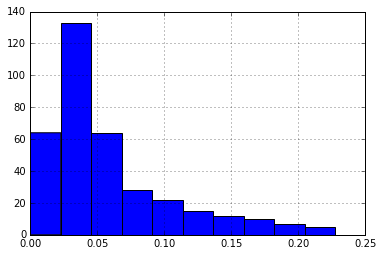

In [28]:
df_temp['ratio'].hist()